In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = r"C:\Users\LENOVO\Desktop\innomatic internship\assignment\scores_data.csv"
df = pd.read_csv(file_path)

df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [4]:
df.describe()


,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [6]:
print(df.columns)


Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [7]:
df.columns = df.columns.str.strip()
df.columns


Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [8]:
df['Score'] = df['Score'].str.split('/').str[0].astype(int)

df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4


In [9]:
students_per_batch = df['Batch'].value_counts()
students_per_batch


Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [10]:
avg_score = df.groupby('Batch')['Score'].mean()
avg_score


Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64

In [11]:
batch_stats = df.groupby('Batch')['Score'].agg(['min', 'max', 'mean'])
batch_stats


,min,max,mean
Batch,,,
AI_ELITE_4,0,7,3.791667
AI_ELITE_6,0,7,4.229167
AI_ELITE_7,2,7,5.056604


In [12]:
df.groupby('Batch')['Score'].value_counts().sort_index()


Batch       Score
AI_ELITE_4  0         1
            1         1
            2         7
            3         8
            4        19
            5         8
            6         1
            7         3
AI_ELITE_6  0         1
            1         2
            2         3
            3         9
            4        11
            5        13
            6         4
            7         5
AI_ELITE_7  2         2
            3         7
            4        10
            5        11
            6        13
            7        10
Name: count, dtype: int64

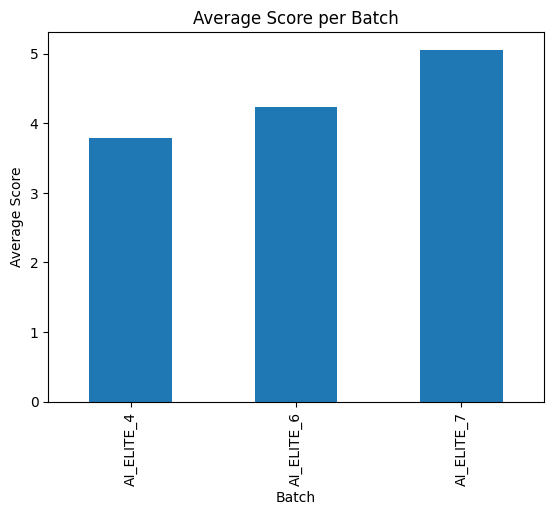

In [13]:
avg_score.plot(kind='bar')
plt.title("Average Score per Batch")
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.show()


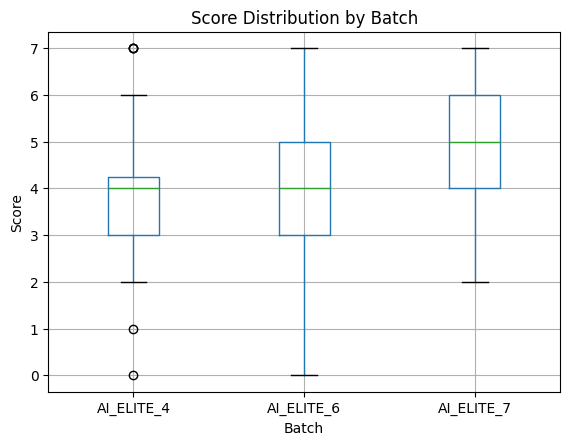

In [14]:
df.boxplot(column='Score', by='Batch')
plt.title("Score Distribution by Batch")
plt.suptitle("")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()


In [15]:
df.isnull().sum()


Batch      0
User_ID    0
Score      0
dtype: int64

In [16]:
df['Result'] = df['Score'].apply(lambda x: 'Pass' if x >= 4 else 'Fail')

pass_percentage = df.groupby('Batch')['Result'].value_counts(normalize=True) * 100
pass_percentage


Batch       Result
AI_ELITE_4  Pass      64.583333
            Fail      35.416667
AI_ELITE_6  Pass      68.750000
            Fail      31.250000
AI_ELITE_7  Pass      83.018868
            Fail      16.981132
Name: proportion, dtype: float64

In [17]:
top_scorers = df[df['Score'] == 7]
top_scorers.groupby('Batch').count()['User_ID']


Batch
AI_ELITE_4     3
AI_ELITE_6     5
AI_ELITE_7    10
Name: User_ID, dtype: int64

In [18]:
low_scorers = df[df['Score'] <= 2]
low_scorers.groupby('Batch').count()['User_ID']


Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
Name: User_ID, dtype: int64

In [20]:
summary = df.groupby('Batch')['Score'].agg(
    Students='count',
    Average_Score='mean',
    Min_Score='min',
    Max_Score='max'
)

summary


,Students,Average_Score,Min_Score,Max_Score
Batch,,,,
AI_ELITE_4,48,3.791667,0,7
AI_ELITE_6,48,4.229167,0,7
AI_ELITE_7,53,5.056604,2,7
